In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras
from keras import backend as K

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
cfg.gpu_options.per_process_gpu_memory_fraction=0.333
K.set_session(K.tf.Session(config=cfg))

Using TensorFlow backend.


## Copyright Note


## Deep Learning Reference

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Deep Learning with Python by Francois Chollet (2018)** [relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)

**Other examples are adapted from wiki and internet resources**

**The materials flow and content copyright to Samir Abdelrahman and DeCART Course 2018**




# What is deep learning?


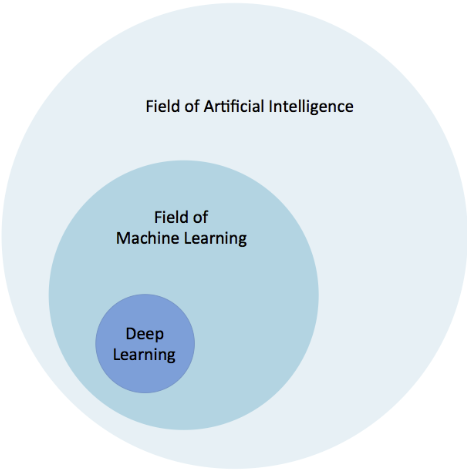

**Artificial Intelligence**: The theory and development of computer systems able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages (1950)
See: https://en.wikipedia.org/wiki/Artificial_intelligence



**Machine Learning**: Learning from data to extract knowledge and rules-- introduing the concepts of training (1959) See: https://en.wikipedia.org/wiki/Machine_learning


**Deep Learning**: Learning data representaion from layer of for specific task (1986) -- a child of nueral network ancestor
See: https://en.wikipedia.org/wiki/Deep_learning

# Neural Network-- weights

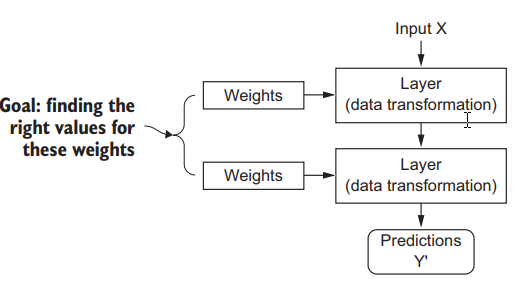



# Neural Network-- Loss function

 
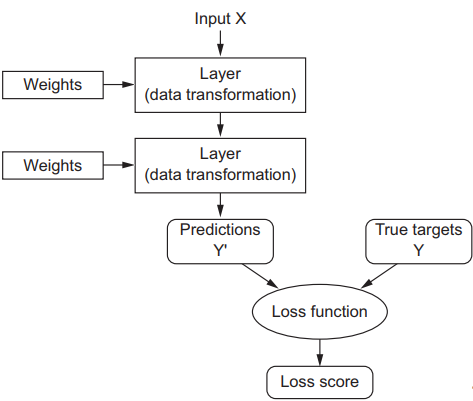


# Neural Network-- Adjust weights

 
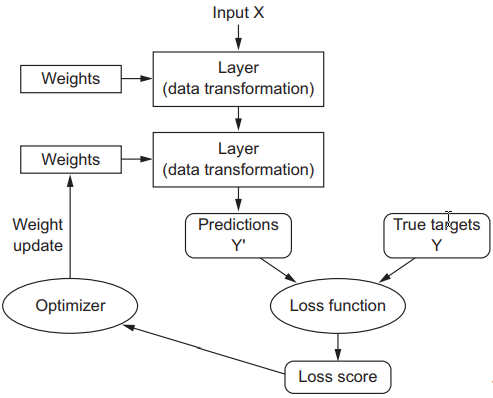


# Neural Network-- Update weights and backpropagation



**The core computational NN methods is to apply linearity then non-linearity**


# Gradient Optimization Concept

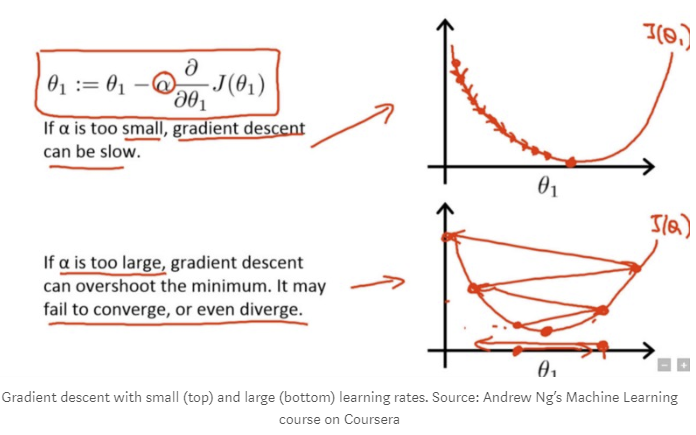

[Link of the figure](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)





**Simple example** https://www.edureka.co/blog/backpropagation/




# Definitions and terminologies


The components of a neural network model i.e **the loss function, optimization algorithm, the activation function** play very important roles in efficiently and effectively training a model and produce accurate results. 

**A loss function (cost objective function)**: How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

**An optimizer**—The mechanism through which the network will update itself based on the data it sees and its loss function.

[relative link](https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c)


**Gradient Descent**: It is an iterative optimization algorithm used in machine learning to find the best results (minima of a curve).
Gradient means the rate of inclination or declination of a slope. Descent means the instance of descending.
[relative link](http://ruder.io/optimizing-gradient-descent/)

**Epochs**: One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.

**Batch Size**: Total number of training examples present in a single batch.

**Iterations**: The numbers of batches needed to complete one epoch. 

[relative link](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9)



**Activation function**- It is a fucntion to add non-linearity after linear transformation on each NN node.

[relative link](https://en.wikipedia.org/wiki/Activation_function)


Simple introduction https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/


# Keras, TensorFlow, Theano, and CNTK

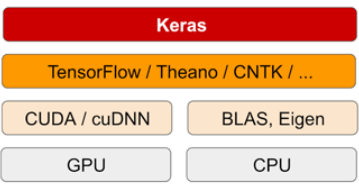


**So what is the difference between Keras and Tensorflow?

**Google web search interest** for different deep-learning frameworks over time

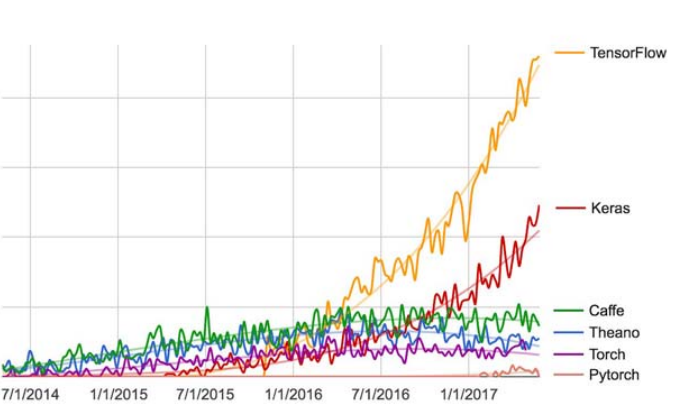

## What are the tensors?

**Tensor is as simple as it is a value container. **



In [3]:
# tensor with 0-dim = scalor
import numpy as np
x=np.array(12)
print(x)
print(x.ndim)

12
0


In [4]:
# Vextor: 1-dim tensor
x=np.array([12,3,6,14])
print(x)
print(x.ndim)

[12  3  6 14]
1


In [5]:
# Matrix: 2-dim tensor
x=np.array([[12,3,6,14],
            [1,2,4,5]])
print(x)
print(x.ndim)

[[12  3  6 14]
 [ 1  2  4  5]]
2


In [6]:
x.shape

(2, 4)

In [7]:
# 3-dim tensor
x=np.array([[[12,3,6,14],
            [1,2,4,5]],
            [[12,3,6,14],
            [1,2,4,5]]
           ])
print(x)
print(x.ndim)

[[[12  3  6 14]
  [ 1  2  4  5]]

 [[12  3  6 14]
  [ 1  2  4  5]]]
3


In [8]:
x.shape

(2, 2, 4)

# Fully-connected Neural Network

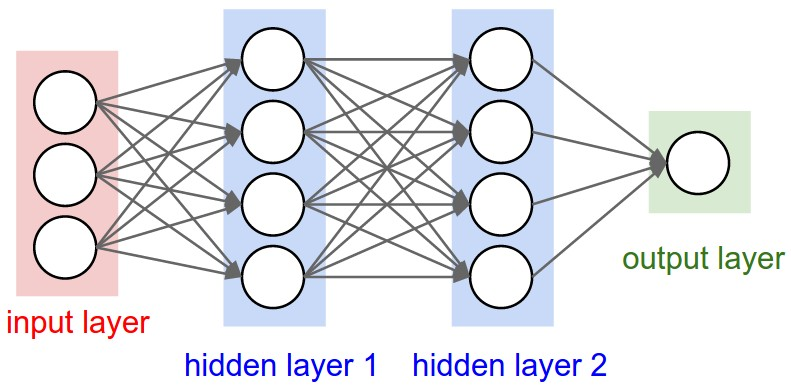

# MNIST Dataset(https://keras.io/datasets/)

## Multi-class problem

Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.




**Remember deep learning is not itself a classifier rather it is a feature learning approach. As such, you can use it to learn representation and you need to end up with a layer of classification (binary or mutli-class) or regression.  It is a feature representation to do a task**

**In spite of the fact it is a high-performing learning approach, but you need to use the best hyper-parameter combination to minimize the computational resourse you have**


In [9]:
#The Mnist database (http://yann.lecun.com/exdb/mnist/)

import warnings
warnings.filterwarnings("ignore")

from keras.datasets import mnist


# Step 1: Load the data
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

#Step 2: See the data distribution
print(len(train_labels))
print(train_labels)
print(train_images.shape)
print(len(test_labels))
print(test_labels)
print(test_images.shape)

60000
[5 0 4 ... 5 6 8]
(60000, 28, 28)
10000
[7 2 1 ... 4 5 6]
(10000, 28, 28)


In [10]:
#Step 3: Prpare the tensors and normalize and have them float
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [11]:
#Step 4: Encode the categories

from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [12]:
import keras
help(keras.layers)

Help on package keras.layers in keras:

NAME
    keras.layers

PACKAGE CONTENTS
    advanced_activations
    convolutional
    convolutional_recurrent
    core
    cudnn_recurrent
    embeddings
    local
    merge
    noise
    normalization
    pooling
    recurrent
    wrappers

FUNCTIONS
    deserialize(config, custom_objects=None)
        Instantiate a layer from a config dictionary.
        
        # Arguments
            config: dict of the form {'class_name': str, 'config': dict}
            custom_objects: dict mapping class names (or function names)
                of custom (non-Keras) objects to class/functions
        
        # Returns
            Layer instance (may be Model, Sequential, Layer...)
    
    serialize(layer)
        Serialize a layer.
        
        # Arguments
            layer: a Layer object.
        
        # Returns
            dictionary with config.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division 

In [13]:
#Build the model
from keras import models
from keras import layers
network =models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Question (Interpret the above model with the summary)?

In [14]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
network.fit(train_images,train_labels,epochs=5,batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2415 - acc: 0.9301
Epoch 2/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0990 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0661 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0477 - acc: 0.9858
Epoch 5/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0368 - acc: 0.9890


In [16]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test_acc',test_acc)

10000/10000 [==============================] - 0s 45us/step
test_acc 0.9795


# [IMDB Database ](https://www.imdb.com/interfaces/)

## Binary class problem

The IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [17]:
#Step 1: Load the data
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

#The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data.

In [18]:
#See the data record
print(train_data[0])
print(len(train_data[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [19]:
#From previous two records, we need:
#1- Unify the length of feature vector
#2- Do one-hot encoder

import numpy as np
def vactorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
x_train=vactorize_sequences(train_data)
x_test=vactorize_sequences(test_data)

In [20]:
print(list(x_train[0]))

[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [21]:
# float the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
#Let us take part of array as a validation dataset
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [23]:
#Build the model, compile. and validate using validation dataset
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

#Build history at each epoch
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 109s 7ms/step - loss: 0.5103 - acc: 0.7795 - val_loss: 0.3836 - val_acc: 0.8659
Epoch 2/20
15000/15000 [==============================] - 10s 668us/step - loss: 0.3015 - acc: 0.9039 - val_loss: 0.2998 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.2163 - acc: 0.9286 - val_loss: 0.3084 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1728 - acc: 0.9437 - val_loss: 0.2828 - val_acc: 0.8852
Epoch 5/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1396 - acc: 0.9554 - val_loss: 0.2856 - val_acc: 0.8862
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1118 - acc: 0.9659 - val_loss: 0.3135 - val_acc: 0.8782
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0946 - acc: 0.9724 - val_loss: 0.3163 -

### Do we have overfitting?

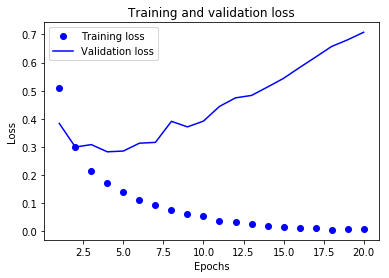

In [25]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

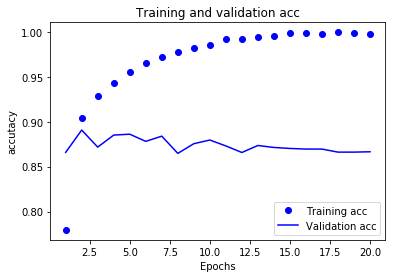

In [26]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training and validation acc")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend()
plt.show()

The training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient descent optimization.

We see the overfitting and also maybe the best choice for epoch = 3

# [Reuters dataset](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection)

## Multi-class problem

The Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

In [27]:
#Load dataset
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [28]:
# Encode the training data
import numpy as np
def vactorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
x_train=vactorize_sequences(train_data)
x_test=vactorize_sequences(test_data)

In [29]:
# Encode the labels
from keras.utils.np_utils import to_categorical
one_hot_train_labels= to_categorical(train_labels)
one_hot_test_labels= to_categorical(test_labels)

In [30]:
#Develop the model with the internal layer hidden nodes= 4
model= models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 673us/step - loss: 0.0957 - acc: 0.9783 - val_loss: 0.0869 - val_acc: 0.9783
Epoch 2/20
7982/7982 [==============================] - 2s 241us/step - loss: 0.0787 - acc: 0.9786 - val_loss: 0.0722 - val_acc: 0.9798
Epoch 3/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.0643 - acc: 0.9815 - val_loss: 0.0609 - val_acc: 0.9830
Epoch 4/20
7982/7982 [==============================] - 2s 198us/step - loss: 0.0538 - acc: 0.9844 - val_loss: 0.0535 - val_acc: 0.9855
Epoch 5/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.0465 - acc: 0.9873 - val_loss: 0.0488 - val_acc: 0.9877
Epoch 6/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.0419 - acc: 0.9890 - val_loss: 0.0459 - val_acc: 0.9886
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.0386 - acc: 0.9898 - val_loss: 0.0444 - val_acc: 0.9891


# Do we have overfitting?

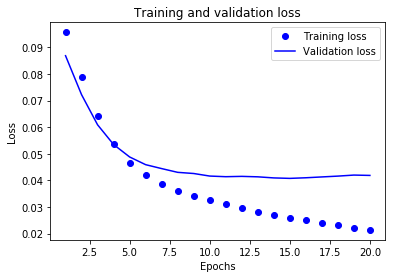

In [31]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

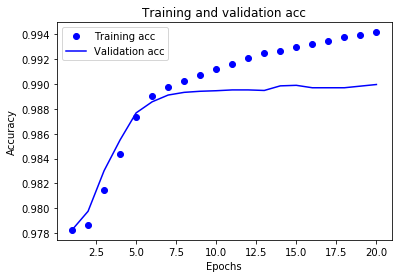

In [32]:
plt.clf()

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training and validation acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
#Develop the model with the internal layer hidden nodes= 64
model= models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 352us/step - loss: 0.0735 - acc: 0.9803 - val_loss: 0.0505 - val_acc: 0.9855
Epoch 2/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.0420 - acc: 0.9886 - val_loss: 0.0393 - val_acc: 0.9898
Epoch 3/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.0322 - acc: 0.9914 - val_loss: 0.0356 - val_acc: 0.9902
Epoch 4/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.0263 - acc: 0.9928 - val_loss: 0.0341 - val_acc: 0.9908
Epoch 5/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.0220 - acc: 0.9938 - val_loss: 0.0323 - val_acc: 0.9912
Epoch 6/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.0183 - acc: 0.9947 - val_loss: 0.0305 - val_acc: 0.9918
Epoch 7/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.0153 - acc: 0.9954 - val_loss: 0.0301 - val_acc: 0.9919


Do we have model overfitting?

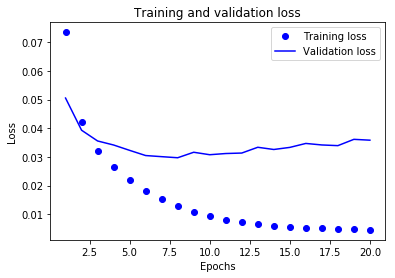

In [34]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

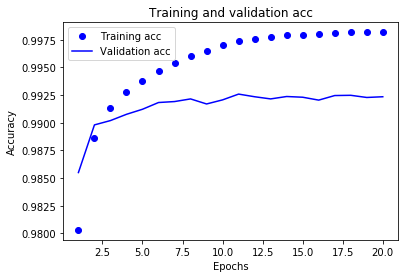

In [35]:
plt.clf()

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training and validation acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

What is the approximate early accurate numbers of epochs I should stop? for each case?

In [36]:
# Consider it #HN=4 and with epochs = 6

model= models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(x_train,
                 one_hot_train_labels,
                 epochs=6,
                 batch_size=512)
results=model.evaluate(x_test,one_hot_test_labels)
results

Epoch 1/6
8982/8982 [==============================] - 1s 157us/step - loss: 0.0953 - acc: 0.9783
Epoch 2/6
8982/8982 [==============================] - 1s 108us/step - loss: 0.0778 - acc: 0.9793
Epoch 3/6
8982/8982 [==============================] - 1s 110us/step - loss: 0.0652 - acc: 0.9827
Epoch 4/6
8982/8982 [==============================] - 1s 114us/step - loss: 0.0567 - acc: 0.9844
Epoch 5/6
8982/8982 [==============================] - 1s 123us/step - loss: 0.0492 - acc: 0.9865
Epoch 6/6
2246/2246 [==============================] - 0s 214us/step


[0.04774637475861892, 0.9884722814003697]

# [The Boston Housing Price dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

## Regression problem

We try to to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on

In [37]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [38]:
print(train_data.shape)
print(train_data.shape[1])

(404, 13)
13


In [39]:
print(test_data.shape)
print(test_data.shape[1])

(102, 13)
13


In [40]:
#Let us Standardize the training then use the information to test
mean=train_data.mean(axis=0)
train_data -=mean
std=train_data.std(axis=0)
train_data /=std
test_data -=mean
test_data /=std

In [41]:
#Develop a model for regression task

from keras import models
from keras import layers

def build_model():
    model= models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [42]:
# 4-fold cross-validation

import numpy as np

k = 4
num_val_samples = len(train_data) // k

num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [43]:
print(all_scores)
np.mean(all_scores)

[2.108246980327191, 2.1075122663290196, 2.889419713822922, 2.453442376438934]


2.3896553342295164

In [44]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [45]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [46]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

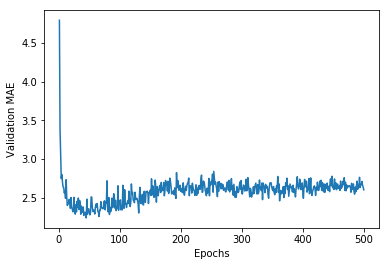

In [47]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Learning rate leads to rapid drop in loss and flunctuatiing loss. **

**Trend decreases and increases *** 

**Also, think of # number of epochs**

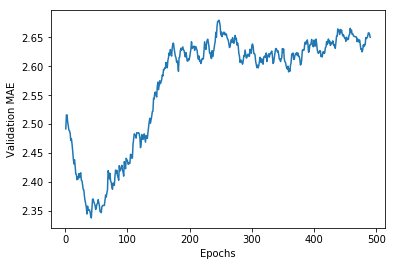

In [48]:
# Doing Smoothing by moving average to understand the graph (https://en.wikipedia.org/wiki/Moving_average)

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [49]:
# Early stopping at 50
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 557us/step


In [50]:
test_mae_score

2.7604652199090696

See the above two curves -- what we should learn about them? (learning rate?)

In [51]:
from keras import models
from keras import layers

RMSopt=keras.optimizers.RMSprop(lr=0.00001)

def build_model():
    model= models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=RMSopt,loss='mse',metrics=['mae'])
    return model

In [52]:
num_epochs = 500  # 500 1000
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [53]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

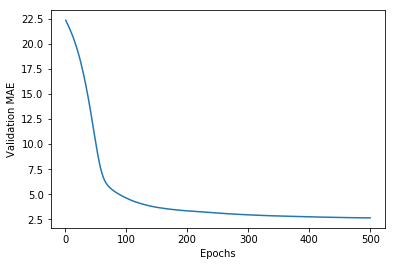

In [54]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

This figure when epochs = 1000 and lr=0.00001

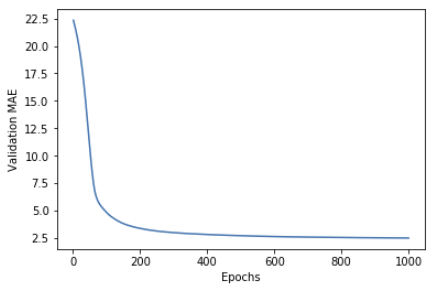

**epochs = 50   => mae_score = 21.48

**epochs = 100  => mae_score = 20.92

**epochs = 500  => mae_score = 5.53

**epochs = 1000  => mae_score = 3.37

**epochs = 3000 => mae_score = 3.04

**epochs = 6000 => mae_score = 2.73

**epochs = 12000 => mae_score = 2.46

**epochs = 40000 => mae_score = 2.33

In [55]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=40000, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 1ms/step


2.4473903225917444

Make a generic model and cross-validation to try different threshold

In [7]:
def load_imdb():
    from keras.datasets import imdb
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
    return train_data, train_labels,test_data, test_labels

def build_model(numOfHiddenUnits,numOfLabels,numOfExamples,myLR):
    from keras import models
    from keras import layers
    
    model= models.Sequential()
    model.add(layers.Dense(numOfHiddenUnits, activation='relu',input_shape=(numOfExamples,)))
    model.add(layers.Dense(numOfHiddenUnits, activation='relu'))
    model.add(layers.Dense(numOfLabels, activation='sigmoid'))
    RMSopt=keras.optimizers.RMSprop(lr=myLR)
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model


def k_cross_validation(k,num_val_samples,num_epochs,numOfHiddenUnits,numOfLabels,numOfExamples,myLR=0.001):

    
    all_loss_histories = []
    
    
    for i in range(k):
        print('processing fold #', i)
        # Prepare the validation data: data from partition # k
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_labels = np.concatenate(
            [train_labels[:i * num_val_samples],
             train_labels[(i + 1) * num_val_samples:]],
            axis=0)

        # Build the Keras model (already compiled)
        model = build_model(numOfHiddenUnits,numOfLabels,numOfExamples,myLR)
        # Train the model (in silent mode, verbose=0)
        history = model.fit(partial_train_data, partial_train_labels,
                            validation_data=(val_data, val_labels),
                            epochs=num_epochs, batch_size=512 ,verbose=0)
        val_loss_history = history.history['val_loss']
        all_loss_histories.append(val_loss_history)
    return [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [8]:
from keras import backend as K
# Some memory clean-up
K.clear_session()

import numpy as np
x_train, y_train,x_test, y_test=load_imdb()

# Our vectorized training data
train_data = vectorize_sequences(x_train)
# Our vectorized test data
test_data = vectorize_sequences(x_test)
# Our vectorized labels# Our ve 
train_labels = np.asarray(y_train).astype('float32')
test_labels = np.asarray(y_test).astype('float32')

In [ ]:
average_loss_history_16=k_cross_validation(4,len(train_data)//4,20,16,1,10000)
print('16\n')

average_loss_history_4=k_cross_validation(4,len(train_data)//4,20,4,1,10000)
print('4\n')

average_loss_history_256=k_cross_validation(4,len(train_data)//4,20,256,1,10000)
print('256\n')


epochs = range(1, len(average_loss_history_16) + 1)
 
# b is for "dot blue line"
plt.plot(epochs, average_loss_history_16, 'bo', label='average_loss_history_16')

# r is for "dot red line"
plt.plot(epochs, average_loss_history_4, 'ro', label='average_loss_history_4')

# g is for "dot green line"
plt.plot(epochs, average_loss_history_256, 'go', label='average_loss_history_256')

plt.title('HiddenLayers_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Results and Analysis

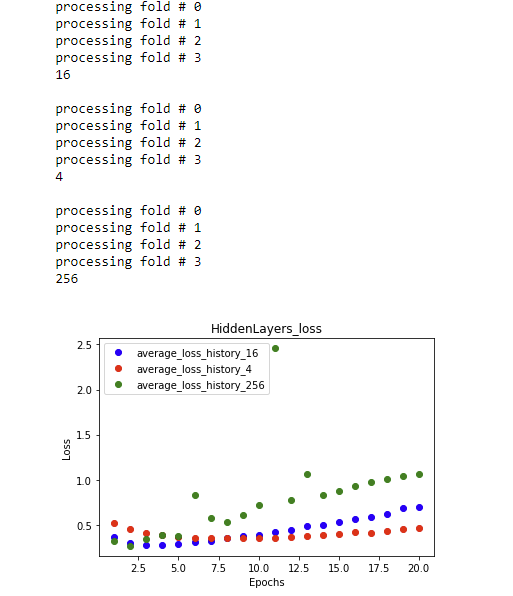

# Let us play

**NN playground** [relative link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.00897&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)